# Risk Factors Cervical Cancer

## Load Data and Data Cleaning 

In [51]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sn
import warnings

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn import svm
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import cross_val_score, cross_val_predict, train_test_split, StratifiedKFold
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report
%matplotlib inline
warnings.filterwarnings("ignore")
data = pd.read_csv("risk_factors_cervical_cancer.csv")
data.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0


In [9]:
data.shape

(858, 36)

# EDA

In [10]:
numerical_df = ['Age', 'Number of sexual partners', 'First sexual intercourse','Num of pregnancies', 'Smokes (years)',
                'Smokes (packs/year)','Hormonal Contraceptives (years)','IUD (years)','STDs (number)']
categorical_df = ['Smokes','Hormonal Contraceptives','IUD','STDs','STDs:condylomatosis','STDs:cervical condylomatosis',
                  'STDs:vaginal condylomatosis','STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
                  'STDs:pelvic inflammatory disease', 'STDs:genital herpes','STDs:molluscum contagiosum', 'STDs:AIDS', 
                  'STDs:HIV','STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis','Dx:Cancer', 'Dx:CIN', 
                  'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller','Citology', 'Biopsy']
target_df = ['Hinselmann', 'Schiller','Citology', 'Biopsy']

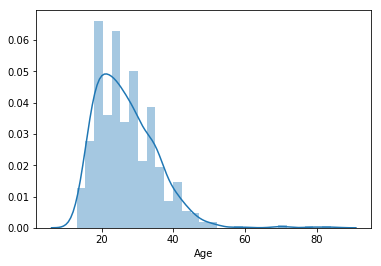

In [11]:
sn.distplot(data['Age'])

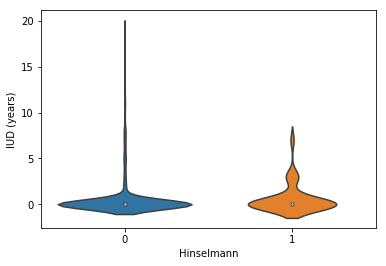

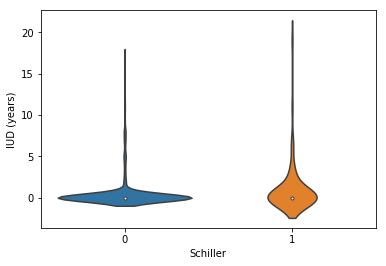

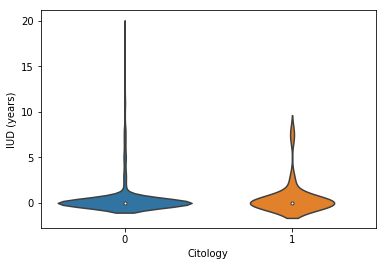

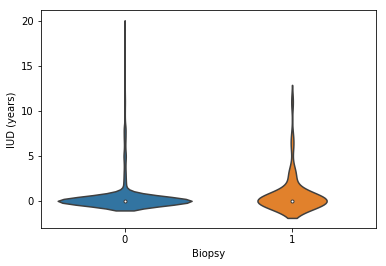

In [12]:
data['IUD (years)'] = data['IUD (years)'].convert_objects(convert_numeric=True)
for i in target_df:
    sn.violinplot(x=i ,y='IUD (years)', data=data)
    plt.show()

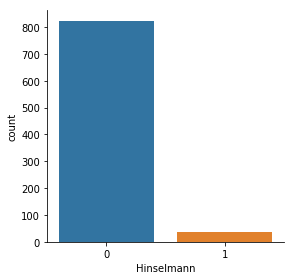

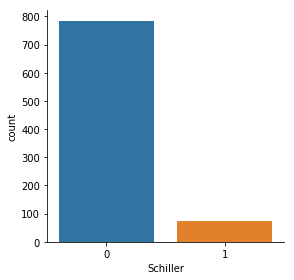

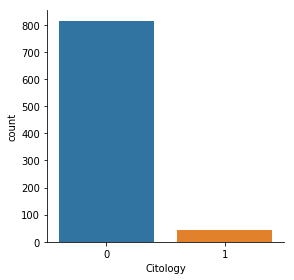

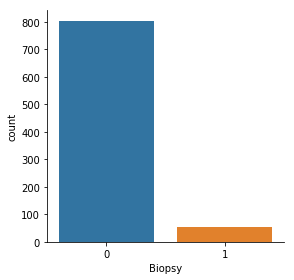

In [13]:
for feature in target_df:
    sn.factorplot(feature,data=data,kind='count')

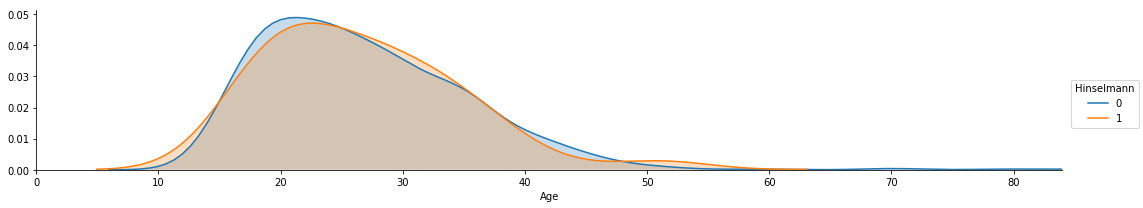

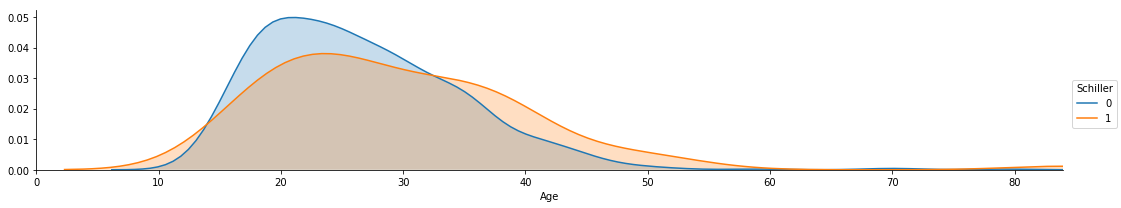

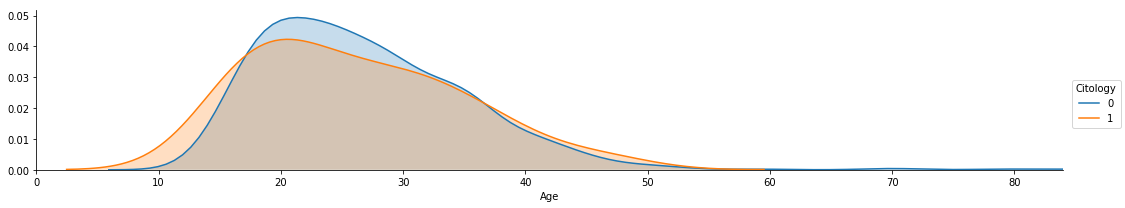

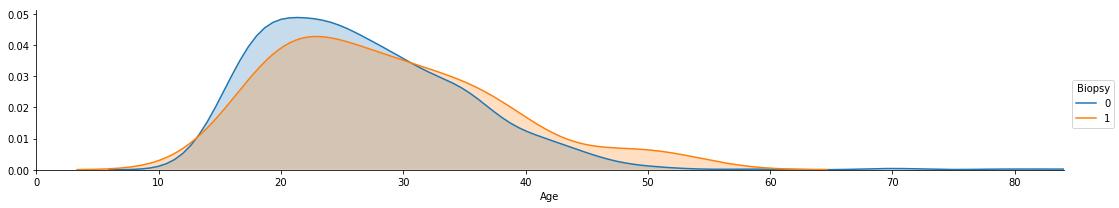

In [14]:
for feature in target_df:
    as_fig = sn.FacetGrid(data,hue=feature,aspect=5)
    as_fig.map(sn.kdeplot,'Age',shade=True)
    oldest = data['Age'].max()
    as_fig.set(xlim=(0,oldest))
    as_fig.add_legend()

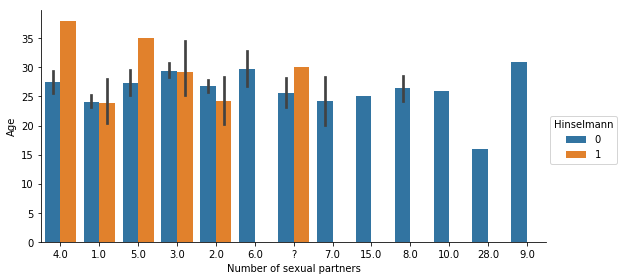

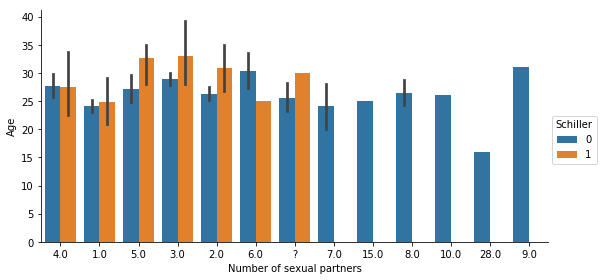

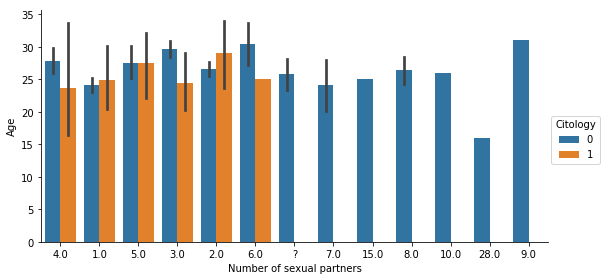

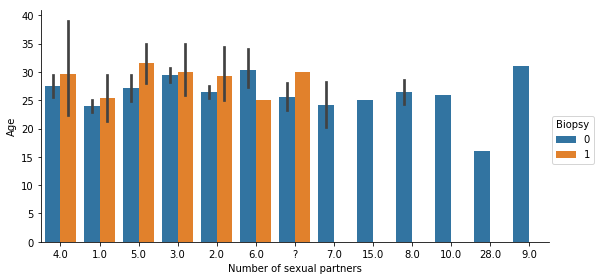

In [15]:
for feature in target_df:
    sn.factorplot(x='Number of sexual partners',y='Age',hue=feature,data=data,aspect=1.95,kind='bar');

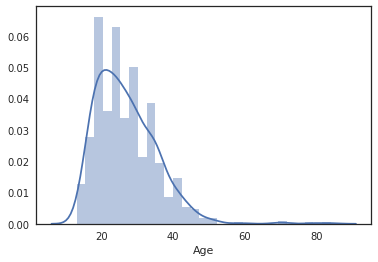

In [16]:
sn.set(style="white", color_codes=True)
sn.distplot(data['Age'])

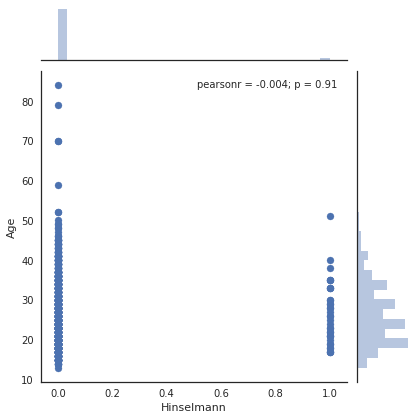

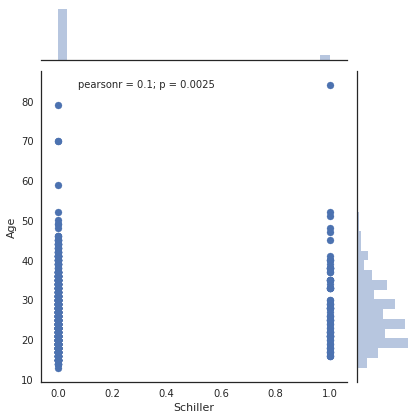

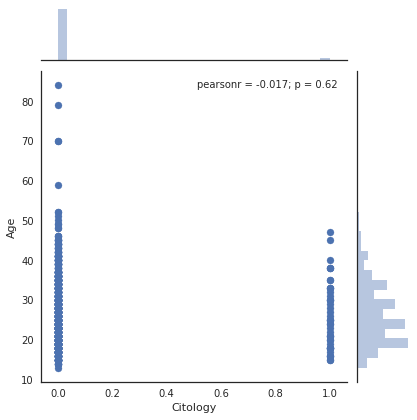

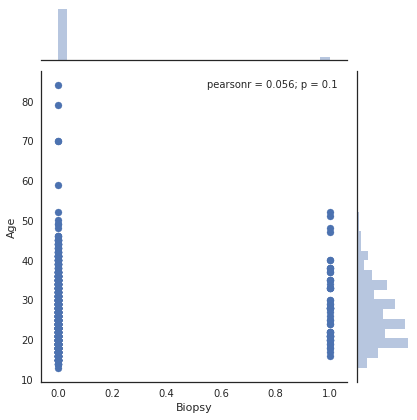

In [17]:
sn.set(style="white", color_codes=True)
for i in target_df:
    sn.jointplot(x=i, y="Age", data=data);
    plt.show();

#### Data Dictionary

Data Set Information:

The dataset was collected at 'Hospital Universitario de Caracas' in Caracas, Venezuela. The dataset comprises demographic information, habits, and historic medical records of 858 patients. Several patients decided not to answer some of the questions because of privacy concerns (missing values).


Attribute Information:

- (int) Age 
- (int) Number of sexual partners 
- (int) First sexual intercourse (age) 
- (int) Num of pregnancies 
- (bool) Smokes 
- (bool) Smokes (years) 
- (bool) Smokes (packs/year) 
- (bool) Hormonal Contraceptives 
- (int) Hormonal Contraceptives (years) 
- (bool) IUD 
- (int) IUD (years) 
- (bool) STDs 
- (int) STDs (number) 
- (bool) STDs:condylomatosis 
- (bool) STDs:cervical condylomatosis 
- (bool) STDs:vaginal condylomatosis 
- (bool) STDs:vulvo-perineal condylomatosis 
- (bool) STDs:syphilis 
- (bool) STDs:pelvic inflammatory disease 
- (bool) STDs:genital herpes 
- (bool) STDs:molluscum contagiosum 
- (bool) STDs:AIDS 
- (bool) STDs:HIV 
- (bool) STDs:Hepatitis B 
- (bool) STDs:HPV 
- (int) STDs: Number of diagnosis 
- (int) STDs: Time since first diagnosis 
- (int) STDs: Time since last diagnosis 
- (bool) Dx:Cancer 
- (bool) Dx:CIN 
- (bool) Dx:HPV 
- (bool) Dx 
- (bool) Hinselmann: target variable 
- (bool) Schiller: target variable 
- (bool) Cytology: target variable 
- (bool) Biopsy: target variable

In [18]:
data.columns

Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV',
       'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis',
       'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller',
       'Citology', 'Biopsy'],
      dtype='object')

In [19]:
### Prev.cervical diagnosis will Probably be the Target Leak Variables
data=data.drop('Dx:Cancer', 1)
data=data.drop('Dx:CIN', 1)
data=data.drop('Dx:HPV', 1)
data=data.drop('Dx', 1)

In [20]:
import numpy as np
data = data.replace('?', np.nan)

In [21]:
print(data.isnull().sum())

Age                                     0
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                  

In [22]:
data2 = data

In [23]:
def age_bin(Age):
    if (Age>0 and Age <= 30):
        return 1
    elif (Age>30 and Age <= 60):
        return 2
    elif (Age>60 and Age <= 90):
        return 3
    else:
        return 4
    
data2["Age_bin"] = data2["Age"].apply(age_bin)
data2 = data2.drop('Age', 1)

In [24]:
try:
    data2['Number of sexual partners'] = data2['Number of sexual partners'].astype(float)
except Exception:
    pass
data2['Number of sexual partners'].describe()

count    832.000000
mean       2.527644
std        1.667760
min        1.000000
25%        2.000000
50%        2.000000
75%        3.000000
max       28.000000
Name: Number of sexual partners, dtype: float64

In [25]:
def sex_partner_bin(number):
    if (number> 0 and number <= 5):
        return 1
    elif (number == 0):
        return 0
    elif (number> 5 and number <= 10):
        return 2
    elif (number> 10 and number <= 15):
        return 3
    elif (number> 15 and number <= 40):
        return 4
    else:
        return "NaN"
    
data2["Number of sexual partners_bin"] = data2["Number of sexual partners"].apply(sex_partner_bin)
data2 = data2.drop('Number of sexual partners', 1)
data2.head()

,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,...,STDs:HPV,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Hinselmann,Schiller,Citology,Biopsy,Age_bin,Number of sexual partners_bin
0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,NaN,NaN,0,0,0,0,1,1
1,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,NaN,NaN,0,0,0,0,1,1
2,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,NaN,NaN,0,0,0,0,2,1
3,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,0.0,0.0,...,0.0,0,NaN,NaN,0,0,0,0,2,1
4,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,0.0,0.0,...,0.0,0,NaN,NaN,0,0,0,0,2,1


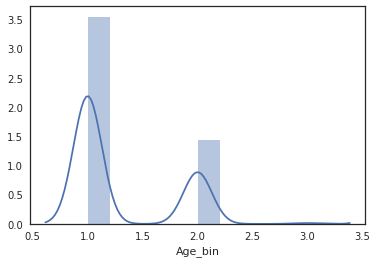

In [26]:
sn.set(style="white", color_codes=True)
sn.distplot(data2['Age_bin'])

In [27]:
try:
    data2['First sexual intercourse'] = data2['First sexual intercourse'].astype(float)
except Exception:
    pass
data2['First sexual intercourse'].describe()

count    851.000000
mean      16.995300
std        2.803355
min       10.000000
25%       15.000000
50%       17.000000
75%       18.000000
max       32.000000
Name: First sexual intercourse, dtype: float64

In [28]:
def sex_intercourse_bin(number):
    if (number>0 and number <= 15):
        return 1
    elif (number == 0):
        return 0
    elif (number> 15 and number <= 30):
        return 2
    elif (number> 30 and number <= 45):
        return 3
    else:
        return "NaN"
    
data2["First sexual intercourse_bin"] = data2["First sexual intercourse"].apply(sex_intercourse_bin)
data2 = data2.drop('First sexual intercourse', 1)
data2.head()

,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),...,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Hinselmann,Schiller,Citology,Biopsy,Age_bin,Number of sexual partners_bin,First sexual intercourse_bin
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,NaN,NaN,0,0,0,0,1,1,1
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,NaN,NaN,0,0,0,0,1,1,1
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,NaN,NaN,0,0,0,0,2,1,NaN
3,4.0,1.0,37.0,37.0,1.0,3.0,0.0,0.0,0.0,0.0,...,0,NaN,NaN,0,0,0,0,2,1,2
4,4.0,0.0,0.0,0.0,1.0,15.0,0.0,0.0,0.0,0.0,...,0,NaN,NaN,0,0,0,0,2,1,2


In [29]:
try:
    data2['Num of pregnancies'] = data2['Num of pregnancies'].astype(float)
except Exception:
    pass
data2['Num of pregnancies'].describe()

count    802.000000
mean       2.275561
std        1.447414
min        0.000000
25%        1.000000
50%        2.000000
75%        3.000000
max       11.000000
Name: Num of pregnancies, dtype: float64

In [30]:
def Num_of_pregnancies_bin(number):
    if (number> 0 and number <= 4):
        return 1
    elif (number == 0):
        return 0
    elif (number> 4 and number <= 8):
        return 2
    elif (number> 8 and number <= 12):
        return 3
    else:
        return "NaN"
    
data2["Num of pregnancies_bin"] = data2["Num of pregnancies"].apply(Num_of_pregnancies_bin)
data2 = data2.drop('Num of pregnancies', 1)
data2.head()

,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Hinselmann,Schiller,Citology,Biopsy,Age_bin,Number of sexual partners_bin,First sexual intercourse_bin,Num of pregnancies_bin
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,1,1,1,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,1,1,1,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,2,1,NaN,1
3,1.0,37.0,37.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,2,1,2,1
4,0.0,0.0,0.0,1.0,15.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,2,1,2,1


In [31]:
try:
    data2['Smokes (years)'] = data2['Smokes (years)'].astype(float)
except Exception:
    pass
print(data2['Smokes (years)'].describe())

try:
    data2['Smokes (packs/year)'] = data2['Smokes (packs/year)'].astype(float)
except Exception:
    pass
print(data2['Smokes (packs/year)'].describe())

count    845.000000
mean       1.219721
std        4.089017
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max       37.000000
Name: Smokes (years), dtype: float64
count    845.000000
mean       0.453144
std        2.226610
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max       37.000000
Name: Smokes (packs/year), dtype: float64


In [32]:
try:
    data2['Hormonal Contraceptives (years)'] = data2['Hormonal Contraceptives (years)'].astype(float)
except Exception:
    pass
print(data2['Hormonal Contraceptives (years)'].describe())

count    750.000000
mean       2.256419
std        3.764254
min        0.000000
25%        0.000000
50%        0.500000
75%        3.000000
max       30.000000
Name: Hormonal Contraceptives (years), dtype: float64


In [33]:
def Hormonal_Contraceptives_year(number):
    if (number>=0 and number <= 5):
        return 1
    elif (number ==0):
        return 0
    elif (number> 5 and number <= 15):
        return 2
    elif (number> 15 and number <= 30):
        return 3
    else:
        return "NaN"
    
data2["Hormonal Contraceptives (years)_bin"] = data2["Hormonal Contraceptives (years)"].apply(Num_of_pregnancies_bin)
data2 = data2.drop('Hormonal Contraceptives (years)', 1)
data2.head()

,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,...,STDs: Time since last diagnosis,Hinselmann,Schiller,Citology,Biopsy,Age_bin,Number of sexual partners_bin,First sexual intercourse_bin,Num of pregnancies_bin,Hormonal Contraceptives (years)_bin
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,0,0,0,0,1,1,1,1,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,0,0,0,0,1,1,1,1,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,0,0,0,0,2,1,NaN,1,0
3,1.0,37.0,37.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,0,0,0,0,2,1,2,1,1
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,0,0,0,0,2,1,2,1,NaN


In [34]:
try:
    data2['IUD (years)'] = data2['IUD (years)'].astype(float)
except Exception:
    pass
print(data2['IUD (years)'].describe())
try:
    data2['STDs (number)'] = data2['STDs (number)'].astype(float)
except Exception:
    pass
print(data2['STDs (number)'].describe())

count    741.000000
mean       0.514804
std        1.943089
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max       19.000000
Name: IUD (years), dtype: float64
count    753.000000
mean       0.176627
std        0.561993
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        4.000000
Name: STDs (number), dtype: float64


In [35]:
def IUD_year(number):
    if (number>=0 and number <= 5):
        return 1
    elif (number ==0):
        return 0
    elif (number> 5 and number <= 15):
        return 2
    elif (number> 15 and number <= 30):
        return 3
    else:
        return "NaN"
    
data2["IUD_year_bin"] = data2["IUD (years)"].apply(IUD_year)
data2 = data2.drop('IUD (years)', 1)
data2.head()

,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,IUD,STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,...,Hinselmann,Schiller,Citology,Biopsy,Age_bin,Number of sexual partners_bin,First sexual intercourse_bin,Num of pregnancies_bin,Hormonal Contraceptives (years)_bin,IUD_year_bin
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,1,1,1,0,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,1,1,1,0,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,2,1,NaN,1,0,1
3,1.0,37.0,37.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,2,1,2,1,1,1
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,2,1,2,1,NaN,1


In [36]:
data2.columns

Index(['Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'IUD', 'STDs', 'STDs (number)',
       'STDs:condylomatosis', 'STDs:cervical condylomatosis',
       'STDs:vaginal condylomatosis', 'STDs:vulvo-perineal condylomatosis',
       'STDs:syphilis', 'STDs:pelvic inflammatory disease',
       'STDs:genital herpes', 'STDs:molluscum contagiosum', 'STDs:AIDS',
       'STDs:HIV', 'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis',
       'Hinselmann', 'Schiller', 'Citology', 'Biopsy', 'Age_bin',
       'Number of sexual partners_bin', 'First sexual intercourse_bin',
       'Num of pregnancies_bin', 'Hormonal Contraceptives (years)_bin',
       'IUD_year_bin'],
      dtype='object')

In [37]:
try:
    data2['STDs: Time since first diagnosis'] = data2['STDs: Time since first diagnosis'].astype(float)
except Exception:
    pass
print(data2['STDs: Time since first diagnosis'].describe())
try:
    data2['STDs: Time since last diagnosis'] = data2['STDs: Time since last diagnosis'].astype(float)
except Exception:
    pass
print(data2['STDs: Time since last diagnosis'].describe())

count    71.000000
mean      6.140845
std       5.895024
min       1.000000
25%       2.000000
50%       4.000000
75%       8.000000
max      22.000000
Name: STDs: Time since first diagnosis, dtype: float64
count    71.000000
mean      5.816901
std       5.755271
min       1.000000
25%       2.000000
50%       3.000000
75%       7.500000
max      22.000000
Name: STDs: Time since last diagnosis, dtype: float64


In [38]:
def Time_since_first_diagnosis(number):
    if (number>=0 and number <= 5):
        return 1
    elif (number ==0):
        return 0
    elif (number> 5 and number <= 15):
        return 2
    elif (number> 15 and number <= 30):
        return 3
    else:
        return "NaN"
    
data2["STDs: Time since first diagnosis_bin"] = data2["STDs: Time since first diagnosis"].apply(Time_since_first_diagnosis)
data2 = data2.drop('STDs: Time since first diagnosis', 1)
    
data2["STDs: Time since last diagnosis_bin"] = data2["STDs: Time since last diagnosis"].apply(Time_since_first_diagnosis)
data2 = data2.drop('STDs: Time since last diagnosis', 1)
data2.head()

,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,IUD,STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,...,Citology,Biopsy,Age_bin,Number of sexual partners_bin,First sexual intercourse_bin,Num of pregnancies_bin,Hormonal Contraceptives (years)_bin,IUD_year_bin,STDs: Time since first diagnosis_bin,STDs: Time since last diagnosis_bin
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,1,1,1,0,1,NaN,NaN
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,1,1,1,0,1,NaN,NaN
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,2,1,NaN,1,0,1,NaN,NaN
3,1.0,37.0,37.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,2,1,2,1,1,1,NaN,NaN
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,2,1,2,1,NaN,1,NaN,NaN


### Clean Target Variable into One Column

In [39]:
data2['Cervical Cancer'] = data2['Hinselmann'] + data2['Schiller'] + data2['Citology'] + data2['Biopsy'] 
data2['Cervical Cancer Target'] = ""
data2['Cervical Cancer Target'][data2['Cervical Cancer'] >0] = 1
data2['Cervical Cancer Target'][data2['Cervical Cancer'] == 0] = 0
data2 = data2.drop('Hinselmann',1)
data2 = data2.drop('Schiller',1)
data2 = data2.drop('Citology',1)
data2 = data2.drop('Biopsy', 1)
data2 = data2.drop('Cervical Cancer', 1)

In [40]:
# class distribution 
class_counts = data2.groupby('Cervical Cancer Target').size()
print(class_counts)
# Imbalance class distribution then cannot use Classification Accuracy as the Evaluation Metric 

Cervical Cancer Target
0    756
1    102
dtype: int64


**Observation :** Data is biased for sure. 

In [41]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 29 columns):
Smokes                                  845 non-null object
Smokes (years)                          845 non-null float64
Smokes (packs/year)                     845 non-null float64
Hormonal Contraceptives                 750 non-null object
IUD                                     741 non-null object
STDs                                    753 non-null object
STDs (number)                           753 non-null float64
STDs:condylomatosis                     753 non-null object
STDs:cervical condylomatosis            753 non-null object
STDs:vaginal condylomatosis             753 non-null object
STDs:vulvo-perineal condylomatosis      753 non-null object
STDs:syphilis                           753 non-null object
STDs:pelvic inflammatory disease        753 non-null object
STDs:genital herpes                     753 non-null object
STDs:molluscum contagiosum              753 non-null

In [42]:
# convert data types
data3 = data2.astype(float)
print(data3.dtypes)

Smokes                                  float64
Smokes (years)                          float64
Smokes (packs/year)                     float64
Hormonal Contraceptives                 float64
IUD                                     float64
STDs                                    float64
STDs (number)                           float64
STDs:condylomatosis                     float64
STDs:cervical condylomatosis            float64
STDs:vaginal condylomatosis             float64
STDs:vulvo-perineal condylomatosis      float64
STDs:syphilis                           float64
STDs:pelvic inflammatory disease        float64
STDs:genital herpes                     float64
STDs:molluscum contagiosum              float64
STDs:AIDS                               float64
STDs:HIV                                float64
STDs:Hepatitis B                        float64
STDs:HPV                                float64
STDs: Number of diagnosis               float64
Age_bin                                 

# t-SNE On Cervical Dataset

In [63]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer() #in scikit-learn
final_counts = count_vect.fit_transform(data['Number of sexual partners'].values)
type(final_counts)

scipy.sparse.csr.csr_matrix

In [64]:
%%time
'''STANDARDIZATION'''

from sklearn.preprocessing import StandardScaler
standardized_data=StandardScaler(with_mean=False).fit_transform(final_counts)
print(standardized_data.shape)

(858, 3)
CPU times: user 1.5 ms, sys: 93 µs, total: 1.59 ms
Wall time: 1.26 ms


In [67]:
%%time
'''SINCE *final_counts* is sparse matrix TruncatedSVD is best suitable.'''
from sklearn.decomposition import TruncatedSVD
tsvd = TruncatedSVD(n_components=2, random_state=0).fit_transform(standardized_data)

CPU times: user 54.8 ms, sys: 8.68 ms, total: 63.5 ms
Wall time: 22.8 ms


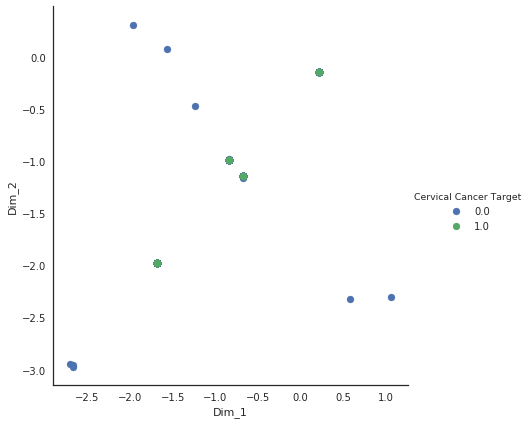

CPU times: user 22 s, sys: 732 ms, total: 22.7 s
Wall time: 22.7 s


In [75]:
%%time
"""
Configuring the parameteres : Default Settings
 the number of components = 2
 perplexity = 100
 learning rate = 200
 Maximum number of iterations for the optimization = 1000
"""
from sklearn.manifold import TSNE
l=data3['Cervical Cancer Target']

model = TSNE(n_components=2, perplexity = 100,random_state=0)

tsne_data = model.fit_transform(tsvd)


# creating a new data frame which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T,l)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "Cervical Cancer Target"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="Cervical Cancer Target", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

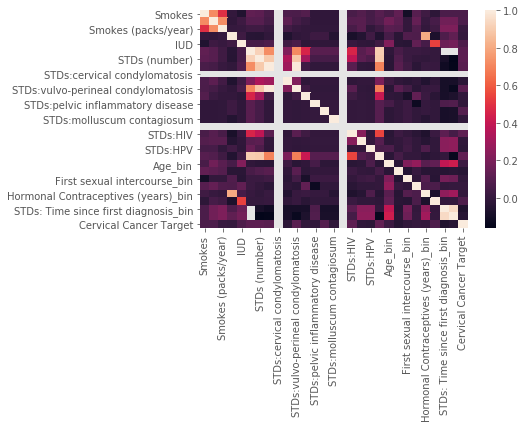

In [30]:
import seaborn
import matplotlib
import matplotlib.pyplot as plt

matplotlib.style.use('ggplot')
correlations = data3.corr()
seaborn.heatmap(correlations)
plt.show()

In [64]:
data3.tail()

,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,IUD,STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,...,STDs: Number of diagnosis,Age_bin,Number of sexual partners_bin,First sexual intercourse_bin,Num of pregnancies_bin,Hormonal Contraceptives (years)_bin,IUD_year_bin,STDs: Time since first diagnosis_bin,STDs: Time since last diagnosis_bin,Cervical Cancer Target
853,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,1.0,2.0,0.0,0.0,1.0,NaN,NaN,0.0
854,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,1.0,2.0,1.0,2.0,1.0,NaN,NaN,0.0
855,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,2.0,0.0,1.0,1.0,NaN,NaN,1.0
856,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,1.0,2.0,1.0,1.0,1.0,NaN,NaN,0.0
857,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,2.0,1.0,1.0,1.0,NaN,NaN,0.0


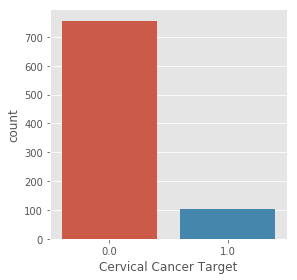

In [58]:
import seaborn as sn
#target_df = ['Hinselmann', 'Schiller','Citology', 'Biopsy']
#for feature in target_df:
sn.factorplot('Cervical Cancer Target',data=data3,kind='count')

Mean age of the Women facing the risk of Cervical cancer 1.2197214125857985


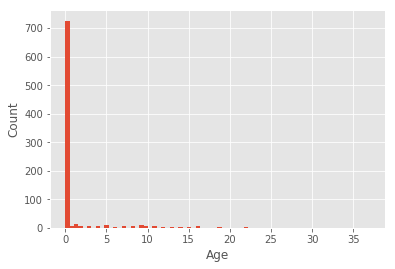

In [63]:
data3['Smokes (years)'].hist(bins=70)
plt.xlabel('Age')
plt.ylabel('Count')
print('Mean age of the Women facing the risk of Cervical cancer',data3['Smokes (years)'].mean())

# Feature Selection and Feature Engineering

In [31]:
# impute missing
from sklearn import preprocessing
from sklearn.preprocessing import Imputer

X = data3.values[:,0:28]
y = data3.values[:,28]

imputer = Imputer(missing_values='NaN', strategy='mean')
X = imputer.fit_transform(X)
print(X)

[[0.         0.         0.         ... 1.         1.52112676 1.49295775]
 [0.         0.         0.         ... 1.         1.52112676 1.49295775]
 [0.         0.         0.         ... 1.         1.52112676 1.49295775]
 ...
 [0.         0.         0.         ... 1.         1.52112676 1.49295775]
 [0.         0.         0.         ... 1.         1.52112676 1.49295775]
 [0.         0.         0.         ... 1.         1.52112676 1.49295775]]


In [32]:
# PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
fit = pca.fit(X)
# summarize components
print("Explained Variance: %s",fit.explained_variance_ratio_)
print(fit.components_)


Explained Variance: %s [0.82411147 0.08390523]
[[ 5.65257444e-02  9.10983796e-01  4.07767691e-01 -7.99705718e-04
   1.67885493e-03  5.55833926e-03  1.01913472e-02  2.07965153e-03
  -2.63045070e-35  1.62623721e-03  2.15711319e-03  4.33757859e-04
  -7.75752827e-05 -7.84171211e-05 -7.84581901e-05 -0.00000000e+00
   2.86631718e-03  8.08172562e-04  4.54548279e-04  5.30983172e-03
   1.78370673e-02  5.07722772e-03 -2.71341003e-04  9.24899773e-03
   1.48421043e-03  2.23015305e-03  2.64634328e-03  2.79665676e-03]
 [-3.72729024e-02 -4.04903724e-01  9.12277985e-01  5.85259660e-03
  -5.12306968e-03 -1.75368236e-02 -3.15373590e-02 -9.46974910e-03
  -6.73561471e-30 -3.92222245e-03 -9.46064446e-03 -3.12191965e-03
   1.31015493e-05  1.97439648e-05  2.33925946e-05  0.00000000e+00
  -3.70217295e-03  6.38783032e-04 -2.55567155e-03 -1.48868477e-02
  -1.85089367e-02 -8.37020064e-04 -1.11500750e-03 -1.02233096e-02
  -1.20408065e-02 -2.20738883e-03 -1.36800284e-03 -1.61215036e-03]]


##### Using RFE find some major features that might contribute to the classification.

In [33]:
# Feature Extraction with RFE
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
model = LogisticRegression()
rfe = RFE(model, 5)
fit = rfe.fit(X, y)
print("Num Features: %d",fit.n_features_)
print("Selected Features: %s",fit.support_)
print("Feature Ranking: %s",fit.ranking_)

Num Features: %d 5
Selected Features: %s [False False False False False False False False False  True False  True
 False  True False False False False False  True False  True False False
 False False False False]
Feature Ranking: %s [ 3 21 20 18  2 22 17 11 24  1  6  1 12  1 10 23  4  9  8  1 16  1 15 14
 19  7  5 13]


## Build Models

In [34]:
# Train test split
from sklearn.cross_validation import cross_val_score, cross_val_predict, train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=12)

In [35]:
from sklearn.linear_model import Lasso, Ridge  
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import cross_validation
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

# Test options and evaluation metric
num_folds = 10
num_instances = len(X_train) 
seed = 12
scoring = 'roc_auc'

# Spot-Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LASSO', Lasso())) 
models.append(('Ridge', Ridge())) 
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('NB', GaussianNB()))
models.append(('CART', DecisionTreeClassifier())) 
models.append(('KNeighborsClassifier', KNeighborsClassifier())) 
#models.append(('XGBClassifier', xgb.XGBClassifier()))
models.append(('GradientBoostingClassifier', GradientBoostingClassifier()))
models.append(('AdaBoostClassifier', AdaBoostClassifier()))
models.append(('RandomForestClassifier', RandomForestClassifier()))
models.append(('ExtraTreesClassifier', ExtraTreesClassifier()))
models.append(('SVC', SVC()))

# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=seed)
    cv_results = cross_validation.cross_val_score(model, X_train, y_train, cv=kfold,
        scoring=scoring)
    results.append(cv_results)
    names.append(name)
    model.fit(X_train, y_train)
    predicted = model.predict(X_test)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.526355 (0.085194)
LASSO: 0.500000 (0.000000)
Ridge: 0.536910 (0.100405)
LDA: 0.596550 (0.103672)
NB: 0.578763 (0.106909)
CART: 0.514142 (0.081447)
KNeighborsClassifier: 0.493817 (0.101834)
GradientBoostingClassifier: 0.577628 (0.064731)
AdaBoostClassifier: 0.580736 (0.105668)
RandomForestClassifier: 0.493347 (0.056456)
ExtraTreesClassifier: 0.505321 (0.087523)
SVC: 0.519010 (0.067026)


In [36]:
# Compare Algorithms
def plot_model_score_distribution(results, names):
    ymin = .1
    ymax = .95
    fig = plt.figure(figsize=(25,10)) 
    fig.suptitle('Algorithm Comparison') 
    ax = fig.add_subplot(111) 
    plt.boxplot(results) 
    ax.set_ylim([ymin,ymax])
    ax.set_xticklabels(names)
    plt.show()

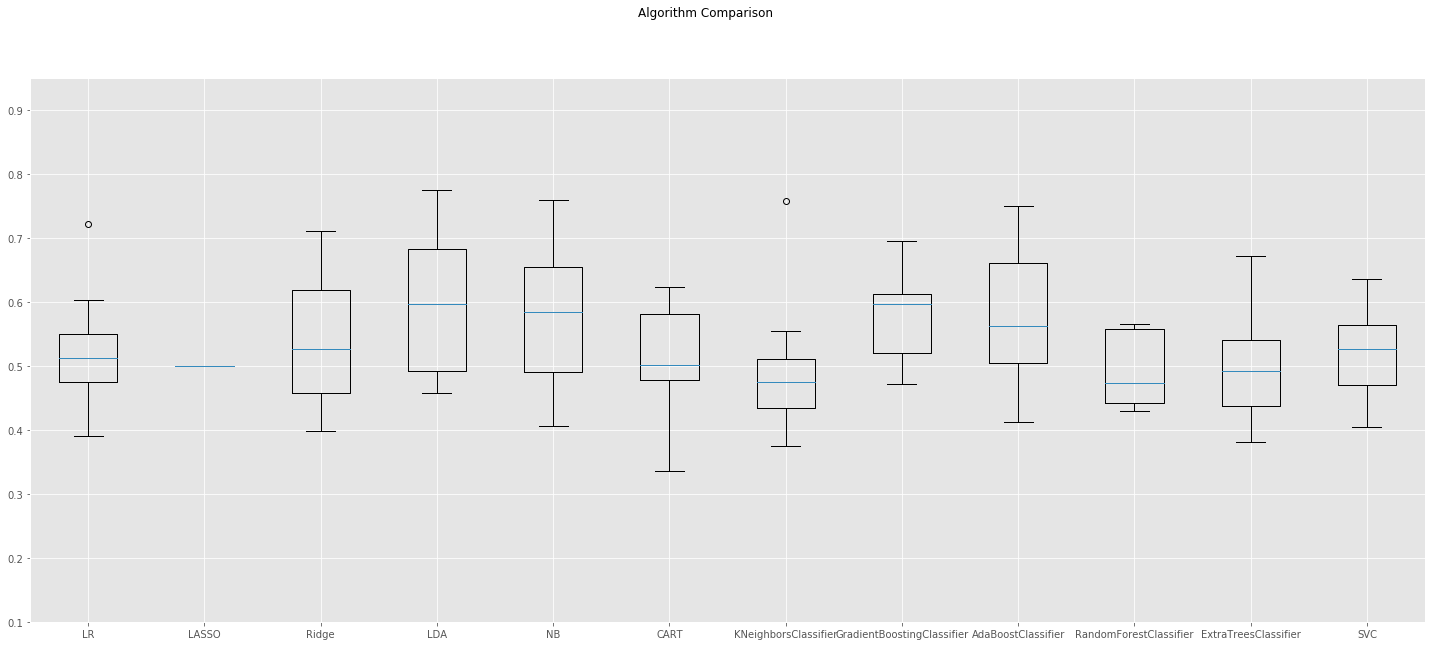

In [37]:
plot_model_score_distribution(results, names)

### Define functions to optimize, fit and evaluate models

In [38]:
from sklearn.grid_search import GridSearchCV
# Define grid search function to optimize F1 score. 
# Why F1 score, not accuracy score? Because the classes are unbalanced,

def gridsearch(model, params):
    gs = GridSearchCV(model, params, scoring='f1_weighted', n_jobs=-1)
    gs.fit(X_train, y_train)
    print('best parameters: ', gs.best_params_)
    print('cross validation F1 score on trainset: ', gs.best_score_)
    print('F1 score on testset: ', gs.score(X_test, y_test))

In [39]:
# Define function to check the accuracy score and make prediction
def validation(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print('accuracy score on testset: ', model.score(X_test, y_test))
    return y_pred

In [40]:
# Define function to produce ROC curve
def plot_roc(model):
    y_score = model.predict_proba(X_test)
    fpr = {}
    tpr = {}
    roc_auc = {}
    labels = []
    plt.figure(figsize=[11,9])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=14)
    plt.ylabel('True Positive Rate', fontsize=14)
    plt.title('Cervical Cancer Risk Factor', fontsize=14)
    for i in range(y_score.shape[1]):
        risk = model.classes_[i]
        fpr[i], tpr[i], _ = roc_curve(y_test, y_score[:,i], pos_label=risk)
        roc_auc[i] = auc(fpr[i], tpr[i])
        labels.append(risk)
        plt.plot(fpr[i], tpr[i], label='roc for {} (area={})'.format(risk, roc_auc[i]), linewidth=4)
    plt.legend(loc="lower right")
    plt.show()

### Random Forest

In [41]:
# Grid search to find the best parameters
seed = 12
rf = RandomForestClassifier(random_state= seed)
rf_params = {'n_estimators': [5,10,15,20,30], 'criterion': ['gini', 'entropy'], 
            'max_features': ['auto', None], 'max_depth': [3,5,10,None]}
gridsearch(rf, rf_params)

best parameters:  {'criterion': 'gini', 'max_depth': 10, 'max_features': 'auto', 'n_estimators': 10}
cross validation F1 score on trainset:  0.8413358457865227
F1 score on testset:  0.8125090278780874


In [42]:
# Use the best parameters to test on testset
rf = RandomForestClassifier(max_features='auto', n_estimators=10, criterion='gini', max_depth=10)
rf_pred = validation(rf)

accuracy score on testset:  0.8662790697674418


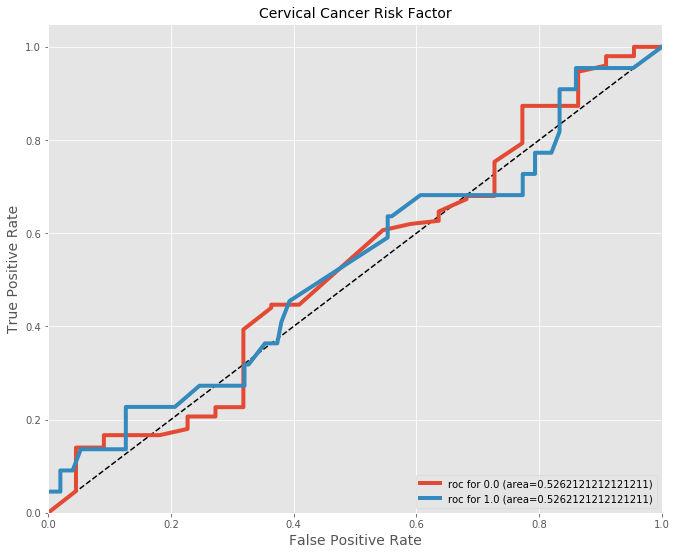

In [43]:
# ROC curve for Random Forest
plot_roc(rf)

### Gradient Boosting

In [44]:
gbc = GradientBoostingClassifier(random_state = seed)
gbc_params = {'n_estimators': [50, 100, 150, 200, 300], 'max_depth': [1,3,5,10,None], 'max_features': ['auto', None]}
gridsearch(gbc, gbc_params)

best parameters:  {'max_depth': 10, 'max_features': 'auto', 'n_estimators': 50}
cross validation F1 score on trainset:  0.8284900643948298
F1 score on testset:  0.8169357626030711


In [45]:
gbc = GradientBoostingClassifier(max_features='auto', n_estimators=50, max_depth=10)
gbc_pred = validation(gbc)

accuracy score on testset:  0.8430232558139535


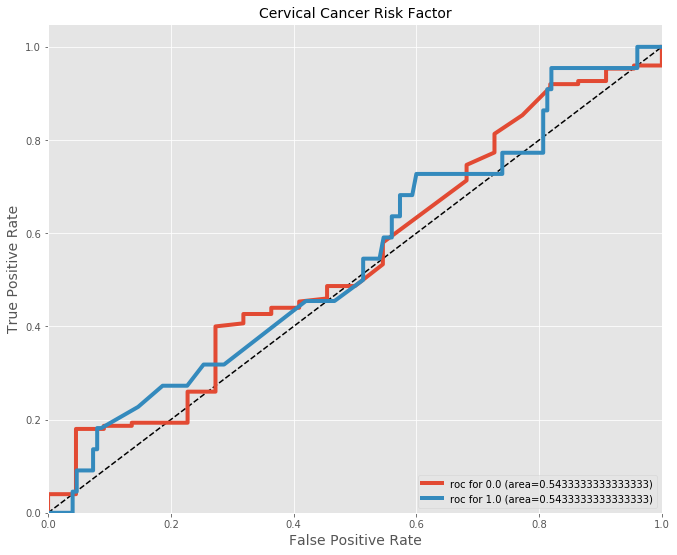

In [46]:
plot_roc(gbc)

### KNN

In [47]:
knn = KNeighborsClassifier()
knn_params={'n_neighbors': [i for i in range(3,80)], 'weights': ['uniform', 'distance']}
gridsearch(knn, knn_params)

best parameters:  {'n_neighbors': 7, 'weights': 'distance'}
cross validation F1 score on trainset:  0.831643391063709
F1 score on testset:  0.8037471750382736


In [48]:
knn = KNeighborsClassifier(n_neighbors=6, weights = 'uniform')
knn_pred = validation(knn)

accuracy score on testset:  0.872093023255814


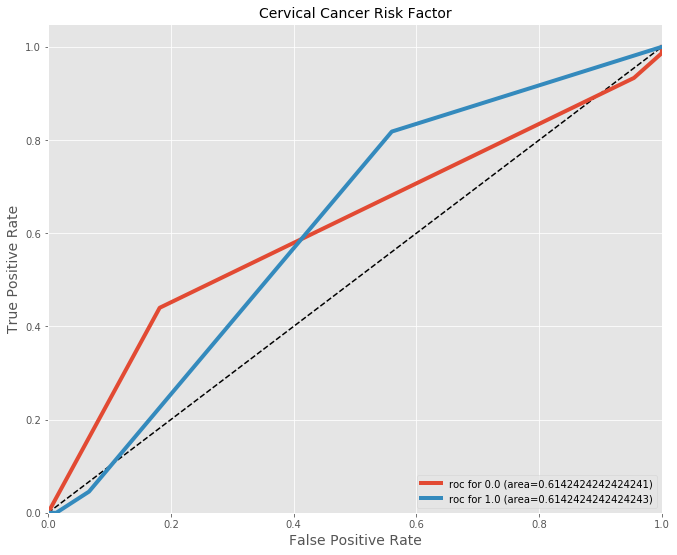

In [49]:
plot_roc(knn)

### Naive Bayes (Gaussian)

accuracy score on testset:  0.29651162790697677


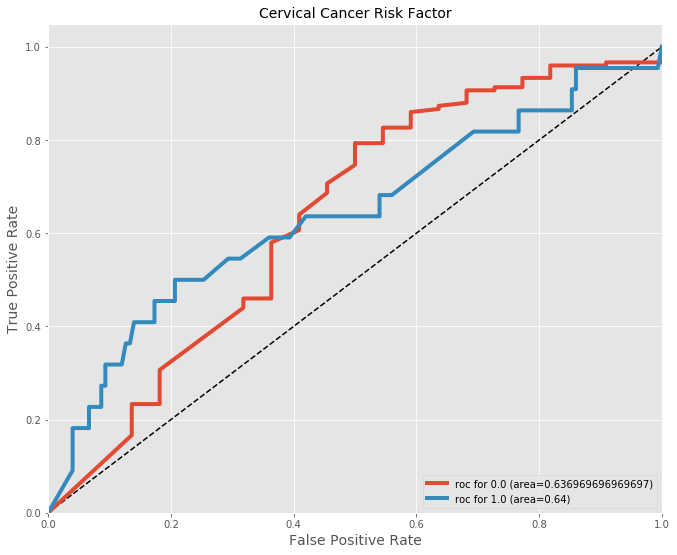

In [50]:
gnb = GaussianNB()
gnb_pred = validation(gnb)
plot_roc(gnb)

### SVM

In [51]:
sv = svm.SVC(kernel='rbf', random_state = seed)
sv_params = {'C': 10.**np.arange(-2,3), 'gamma': 10.**np.arange(-5,2)}
gridsearch(sv, sv_params)

best parameters:  {'C': 10.0, 'gamma': 1.0}
cross validation F1 score on trainset:  0.8380966303443314
F1 score on testset:  0.8096066072592915


In [52]:
sv = svm.SVC(kernel='rbf', C=100, gamma=1.0, probability=True, class_weight='balanced')
sv_pred = validation(sv)

accuracy score on testset:  0.7441860465116279


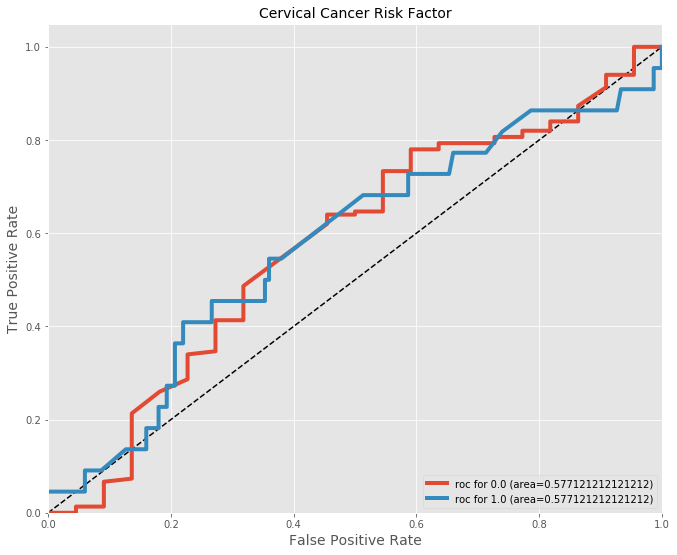

In [53]:
plot_roc(sv)